#IMPORT *LIBRARIES*


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
df=pd.read_csv("/Titanic-Dataset.csv")


In [ ]:
df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
M_age = df['Age'].median()
df['Age'].fillna(M_age, inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

mode_em = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_em, inplace=True)

In [ ]:
df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

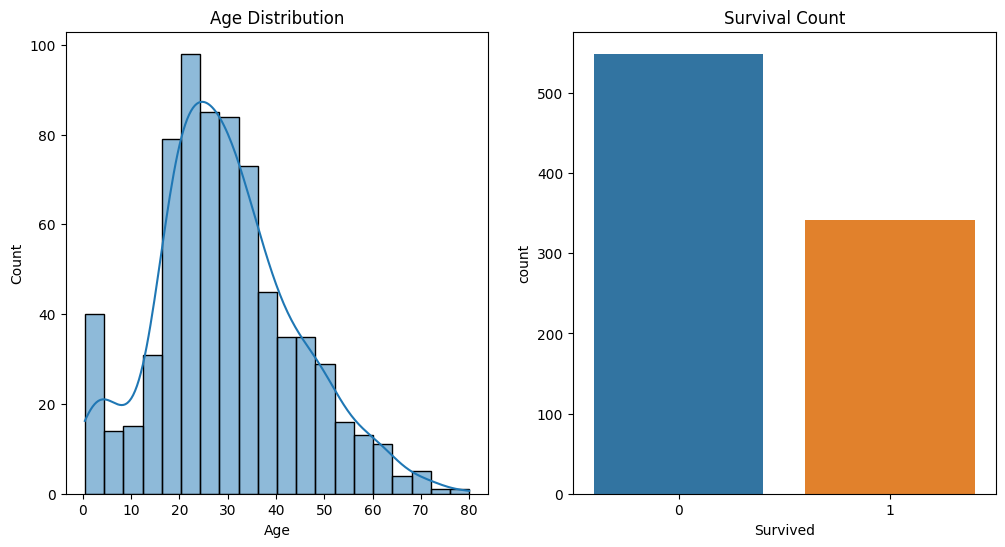

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

plt.show()

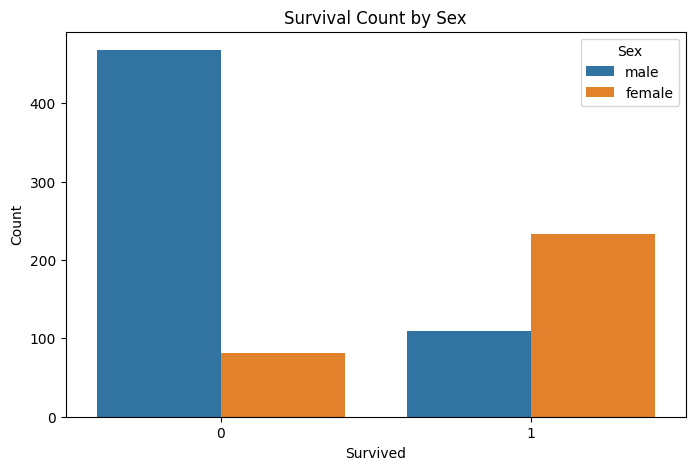

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<ipython-input-16-cb15ebe1fe06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


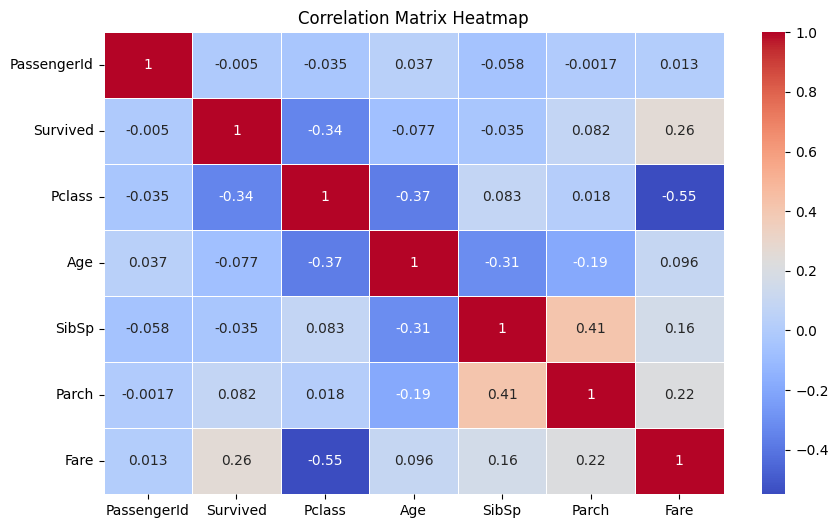

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-17-e83c6ba5534a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', ci=None)


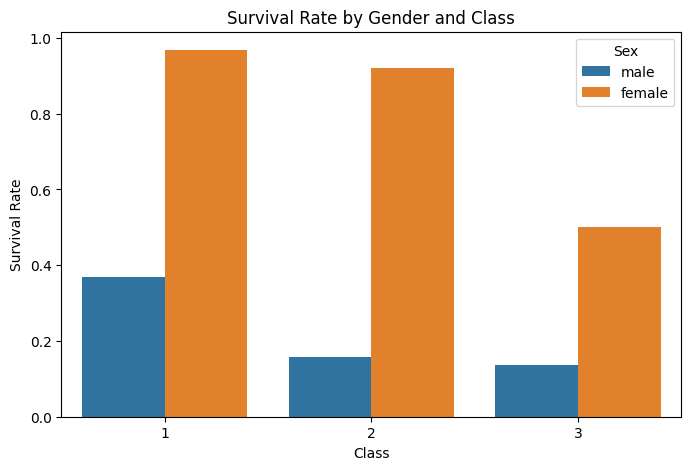

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', ci=None)
plt.title('Survival Rate by Gender and Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

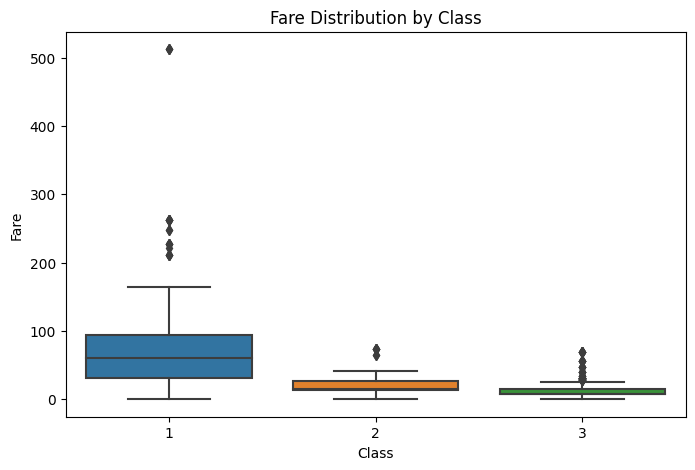

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

<Axes: xlabel='Fare'>

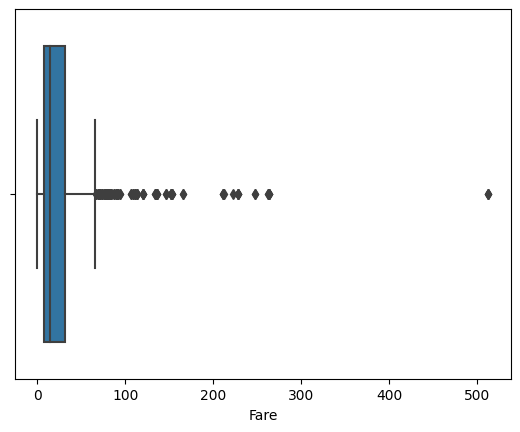

In [ ]:
sns.boxplot(x=df['Fare'])

<Axes: xlabel='Age'>

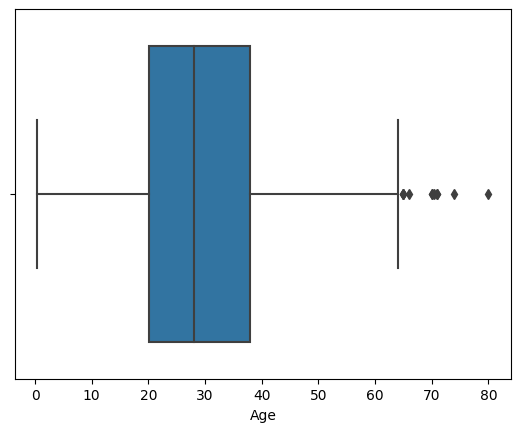

In [ ]:
sns.boxplot(x=df['Age'])


OUTLINERS EXIST IN BOTH

In [ ]:
A = df.drop('Survived', axis=1)
B = df['Survived']

In [ ]:
label_en = LabelEncoder()
A['Sex'] = label_en.fit_transform(A['Sex'])
A['Embarked'] = label_en.fit_transform(A['Embarked'])

In [ ]:
ruler = StandardScaler()
A[['Age', 'Fare']] = ruler.fit_transform(A[['Age', 'Fare']])
A.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,Unknown,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,C85,0
2,3,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,Unknown,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,C123,2
4,5,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,Unknown,2


In [ ]:
Atrain, Atest, Btrain, Btest = train_test_split(A, B, test_size=0.2, random_state=42)


In [ ]:
Atrain.shape

(712, 11)